## Importing the Python Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Load the Dataset

In [32]:
data = pd.read_csv('Featured_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14246 non-null  float64
 1   Latitude          14246 non-null  float64
 2   Speed             14246 non-null  float64
 3   Distance          14246 non-null  float64
 4   Time              14246 non-null  object 
 5   Acc X             14246 non-null  float64
 6   Acc Y             14246 non-null  float64
 7   Acc Z             14246 non-null  float64
 8   Heading           14246 non-null  int64  
 9   gyro_x            14246 non-null  float64
 10  gyro_y            14246 non-null  float64
 11  gyro_z            14246 non-null  float64
 12  label             14246 non-null  int64  
 13  Acc_Magnitude     14246 non-null  float64
 14  Acc_Change        14246 non-null  float64
 15  Gyro_Magnitude    14246 non-null  float64
 16  Gyro_Change       14246 non-null  float6

In [33]:
data.describe()

,Longitude,Latitude,Speed,Distance,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,...,Gyro_Change,Net_Displacement,Speed_Change,Heading_Change,Rolling_Acc_Mean,Rolling_Acc_STD,acc_mean,acc_std,gyro_mean,gyro_std
count,14246.000000,14246.000000,14246.000000,1.424600e+04,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,...,14246.000000,14246.000000,1.424600e+04,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000
mean,73.826564,18.508567,0.771898,2.795223e+03,-0.001137,0.180237,-0.023576,171.269128,-0.001319,-0.006521,...,-0.000001,0.000004,-9.351872e-20,-0.023937,1.608040,0.742972,0.051841,0.926517,-0.003680,0.077019
std,0.003661,0.005242,0.705439,1.205988e+05,1.030982,0.837260,1.768811,105.496919,0.141039,0.087850,...,0.104109,0.000016,3.588373e-02,17.575867,1.227237,0.700332,0.691140,0.940104,0.051239,0.079085
min,73.821195,18.501504,0.000000,0.000000e+00,-8.805807,-8.476646,-17.320633,0.000000,-2.062668,-0.571912,...,-1.387471,0.000000,-7.600000e-01,-359.000000,0.144979,0.015304,-9.247761,0.007141,-0.780774,0.000224
25%,73.822785,18.504085,0.000000,4.480815e+02,-0.378820,-0.126690,-0.701545,77.000000,-0.046690,-0.033272,...,-0.031879,0.000000,0.000000e+00,0.000000,0.667844,0.269350,-0.226714,0.324081,-0.020247,0.023565
50%,73.828663,18.507860,0.760000,1.007369e+03,-0.013089,0.167227,-0.025761,150.000000,-0.002219,-0.005783,...,-0.000116,0.000000,0.000000e+00,0.000000,1.284077,0.527778,0.049606,0.622861,-0.003754,0.049857
75%,73.829445,18.513463,1.220000,1.645653e+03,0.362683,0.478868,0.674922,249.000000,0.044939,0.021706,...,0.030804,0.000000,0.000000e+00,0.000000,2.093364,0.951488,0.320148,1.195859,0.014410,0.104188
max,73.831393,18.518714,2.712000,8.312031e+06,10.488632,11.013258,19.725800,359.000000,1.611687,0.599585,...,1.626290,0.000231,9.280000e-01,359.000000,12.513593,7.277411,9.133835,13.711424,0.492676,1.110263


## Using Isolation Forest for outliers detection 

Accuracy: 0.4931
Precision: 0.9284
Recall: 0.1567
F1 Score: 0.2682


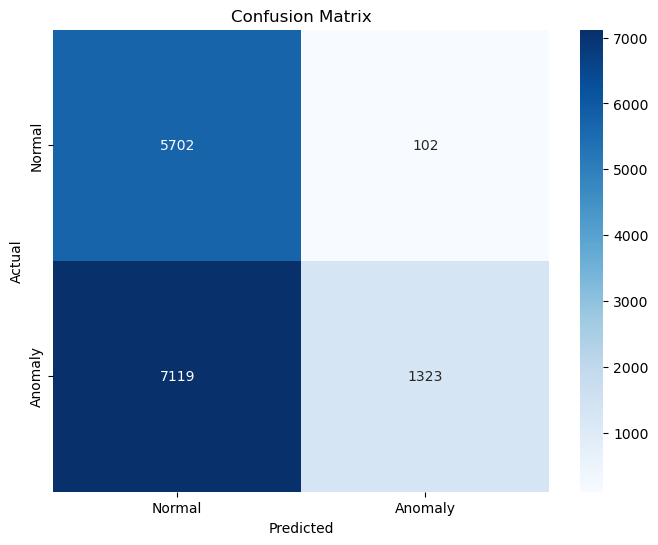

              precision    recall  f1-score   support

      Normal       0.44      0.98      0.61      5804
     Anomaly       0.93      0.16      0.27      8442

    accuracy                           0.49     14246
   macro avg       0.69      0.57      0.44     14246
weighted avg       0.73      0.49      0.41     14246



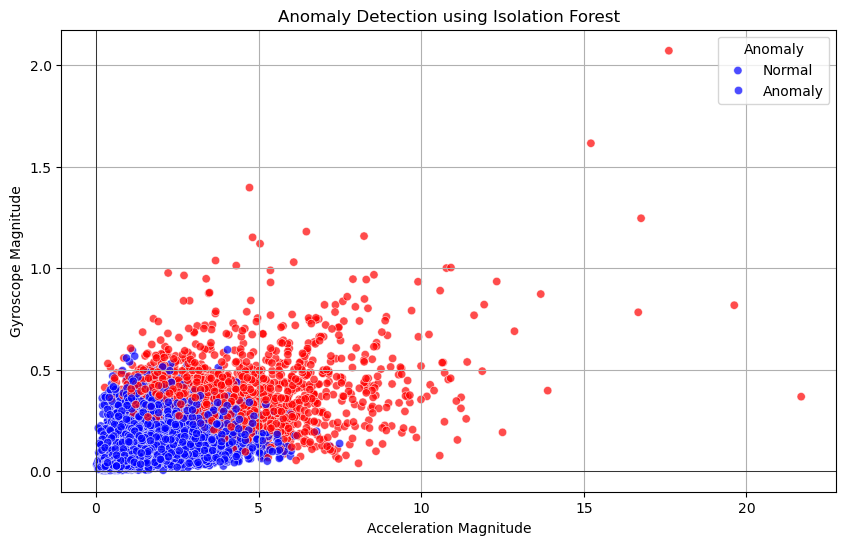

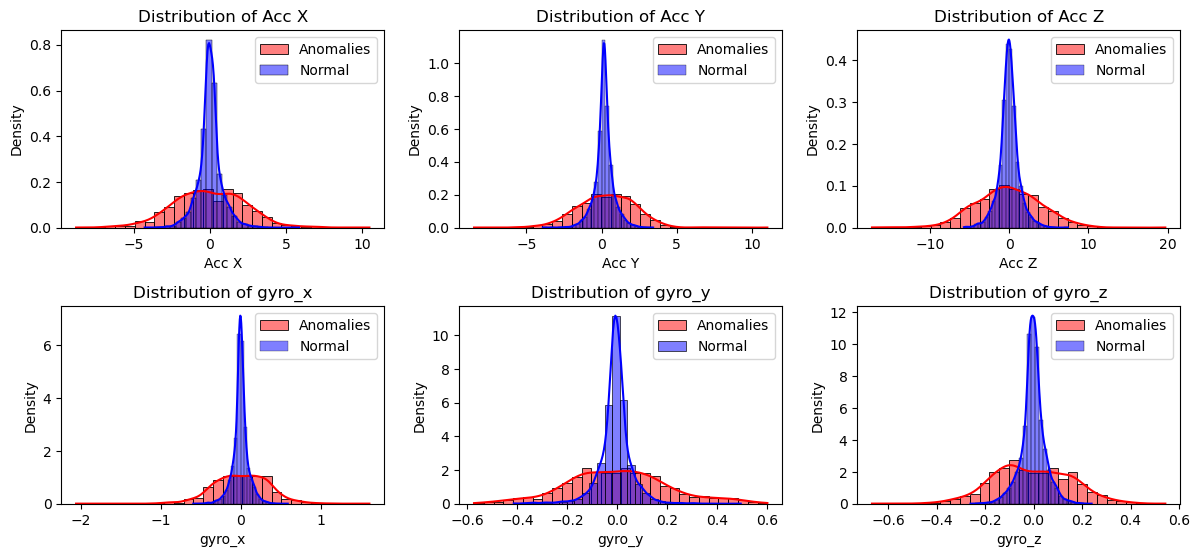

In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']  # Modify as needed
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed

# Fit the model
iso_forest.fit(X_scaled)

# Predict anomalies
data['anomaly'] = iso_forest.predict(X_scaled)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation

 # Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(data['label'], data['anomaly'])
precision = precision_score(data['label'], data['anomaly'])
recall = recall_score(data['label'], data['anomaly'])
f1 = f1_score(data['label'], data['anomaly'])
        
# Print and store the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(data['label'], data['anomaly'])  # Replace 'label' with your actual label column name

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(data['label'], data['anomaly'], target_names=['Normal', 'Anomaly']))

# Visualizing anomalies on feature space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Acc_Magnitude', y='Gyro_Magnitude', hue='anomaly', 
                palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Acceleration Magnitude')
plt.ylabel('Gyroscope Magnitude')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.show()

# Visualize the distribution of anomalies
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 3, features.index(feature) + 1)  # Adjust the layout as needed
    sns.histplot(data[data['anomaly'] == 1][feature], color='red', bins=30, kde=True, label='Anomalies', stat='density', alpha=0.5)
    sns.histplot(data[data['anomaly'] == 0][feature], color='blue', bins=30, kde=True, label='Normal', stat='density', alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()


## Accuracy at different value of Contamination


Evaluating for contamination = 0.05
Accuracy: 0.4517
Precision: 0.9425
Recall: 0.0796
F1 Score: 0.1468

Evaluating for contamination = 0.1
Accuracy: 0.4931
Precision: 0.9284
Recall: 0.1567
F1 Score: 0.2682

Evaluating for contamination = 0.2
Accuracy: 0.5691
Precision: 0.9042
Recall: 0.3051
F1 Score: 0.4563

Evaluating for contamination = 0.3
Accuracy: 0.6438
Precision: 0.8940
Recall: 0.4526
F1 Score: 0.6010

Evaluating for contamination = 0.4
Accuracy: 0.7137
Precision: 0.8829
Recall: 0.5959
F1 Score: 0.7116

Evaluating for contamination = 0.5
Accuracy: 0.7731
Precision: 0.8656
Recall: 0.7304
F1 Score: 0.7923

Best contamination: 0.5 with Accuracy: 0.7731
Precision: 0.8656, Recall: 0.7304, F1 Score: 0.7923


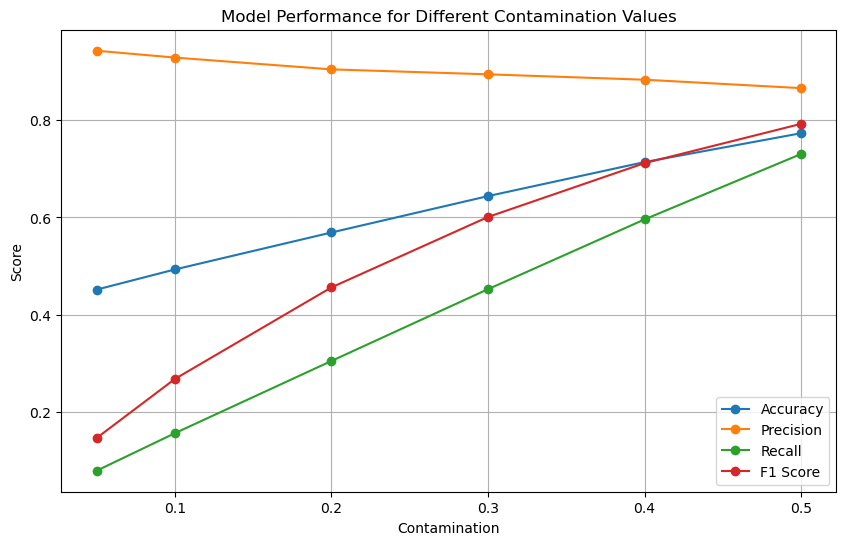

In [16]:
# Function to evaluate model performance for different contamination values
def evaluate_model_for_contamination(data, X_scaled, contamination_values):
    results = []
    
    for contamination in contamination_values:
        print(f"\nEvaluating for contamination = {contamination}")
        
        # Create the Isolation Forest model
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        
        # Fit the model
        iso_forest.fit(X_scaled)
        
        # Predict anomalies
        data['anomaly'] = iso_forest.predict(X_scaled)
        data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'contamination': contamination,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of contamination values to try
contamination_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

# Call the function to evaluate the model for different contamination values
results = evaluate_model_for_contamination(data, X_scaled, contamination_values)

# Print the best contamination and its corresponding accuracy
best_contamination = max(results, key=lambda x: x['accuracy'])
print(f"\nBest contamination: {best_contamination['contamination']} with Accuracy: {best_contamination['accuracy']:.4f}")
print(f"Precision: {best_contamination['precision']:.4f}, Recall: {best_contamination['recall']:.4f}, F1 Score: {best_contamination['f1_score']:.4f}")

# Optionally, you can visualize the results
import matplotlib.pyplot as plt

# Plot the results
contaminations = [result['contamination'] for result in results]
accuracies = [result['accuracy'] for result in results]
precisions = [result['precision'] for result in results]
recalls = [result['recall'] for result in results]
f1_scores = [result['f1_score'] for result in results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score
plt.plot(contaminations, accuracies, label='Accuracy', marker='o')
plt.plot(contaminations, precisions, label='Precision', marker='o')
plt.plot(contaminations, recalls, label='Recall', marker='o')
plt.plot(contaminations, f1_scores, label='F1 Score', marker='o')

plt.title('Model Performance for Different Contamination Values')
plt.xlabel('Contamination')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# checking the label data 
normal_count = (data['label'] == 0).sum()
anomaly_count = (data['label'] == 1).sum()
print(f'normal_count = {normal_count} \nanomaly_count = {anomaly_count}' )
# pertange of data
anomaly_count_percent = (anomaly_count/(normal_count+anomaly_count)) *100
normal_count_percent = (normal_count/(normal_count+anomaly_count)) *100
print(f'{normal_count_percent:.2f}% data are normal and {anomaly_count_percent:.2f}% data are anomaly')

normal_count = 5804 
anomaly_count = 8442
40.74% data are normal and 59.26% data are anomaly


## Isolation Forest with contamination 0.5

Accuracy: 0.7731
Precision: 0.8656
Recall: 0.7304
F1 Score: 0.7923


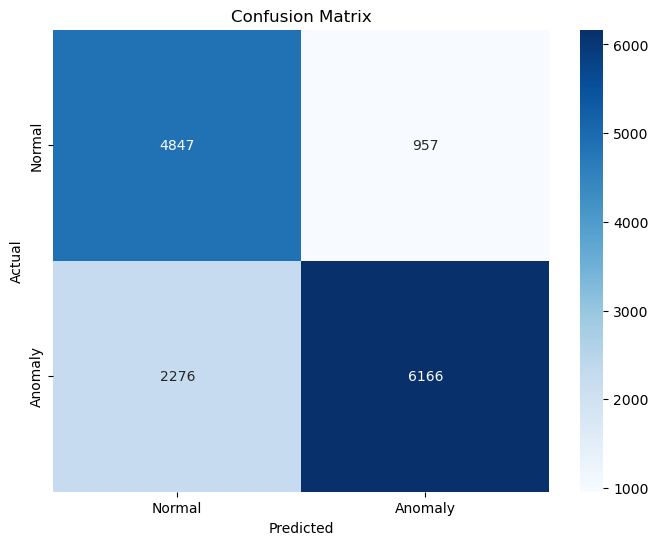

              precision    recall  f1-score   support

      Normal       0.68      0.84      0.75      5804
     Anomaly       0.87      0.73      0.79      8442

    accuracy                           0.77     14246
   macro avg       0.77      0.78      0.77     14246
weighted avg       0.79      0.77      0.78     14246



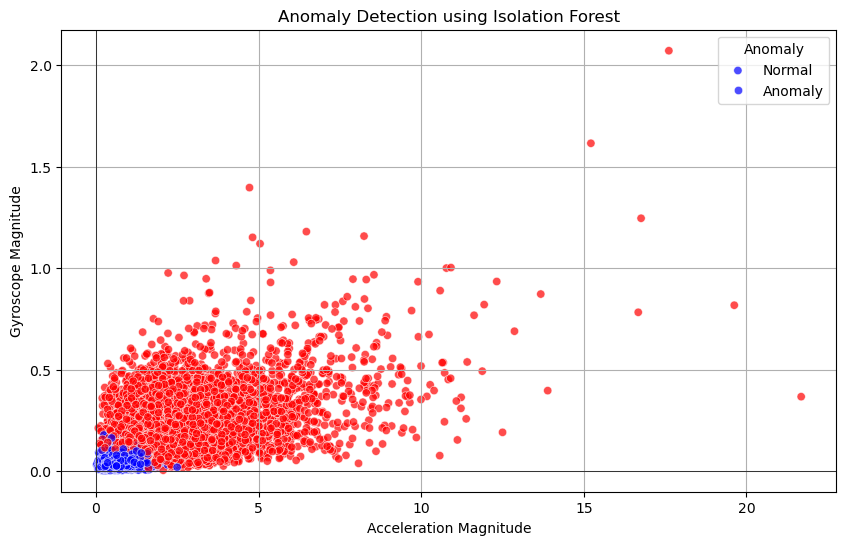

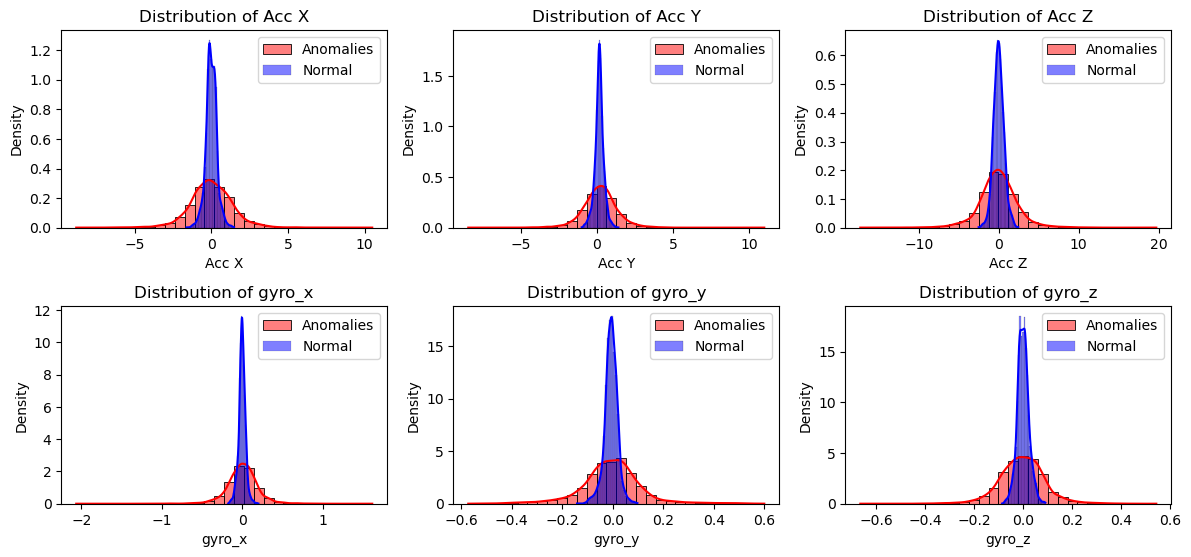

In [18]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']  # Modify as needed
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the Isolation Forest model
iso_forest = IsolationForest(contamination=0.5, random_state=42)  # Adjust contamination as needed

# Fit the model
iso_forest.fit(X_scaled)

# Predict anomalies
data['anomaly'] = iso_forest.predict(X_scaled)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation

 # Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(data['label'], data['anomaly'])
precision = precision_score(data['label'], data['anomaly'])
recall = recall_score(data['label'], data['anomaly'])
f1 = f1_score(data['label'], data['anomaly'])
        
# Print and store the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(data['label'], data['anomaly'])  # Replace 'label' with your actual label column name

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(data['label'], data['anomaly'], target_names=['Normal', 'Anomaly']))

# Visualizing anomalies on feature space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Acc_Magnitude', y='Gyro_Magnitude', hue='anomaly', 
                palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Acceleration Magnitude')
plt.ylabel('Gyroscope Magnitude')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.show()

# Visualize the distribution of anomalies
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 3, features.index(feature) + 1)  # Adjust the layout as needed
    sns.histplot(data[data['anomaly'] == 1][feature], color='red', bins=30, kde=True, label='Anomalies', stat='density', alpha=0.5)
    sns.histplot(data[data['anomaly'] == 0][feature], color='blue', bins=30, kde=True, label='Normal', stat='density', alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()


## Accuracy at different value of N-Neighbors (Local Outlier Factor)


Evaluating for n_neighbors = 5
Accuracy: 0.5814
Precision: 0.6740
Recall: 0.5687
F1 Score: 0.6169

Evaluating for n_neighbors = 10
Accuracy: 0.6153
Precision: 0.7078
Recall: 0.5973
F1 Score: 0.6479

Evaluating for n_neighbors = 20
Accuracy: 0.6429
Precision: 0.7355
Recall: 0.6206
F1 Score: 0.6732

Evaluating for n_neighbors = 30
Accuracy: 0.6558
Precision: 0.7484
Recall: 0.6315
F1 Score: 0.6850

Evaluating for n_neighbors = 40
Accuracy: 0.6671
Precision: 0.7597
Recall: 0.6410
F1 Score: 0.6953

Evaluating for n_neighbors = 50
Accuracy: 0.6748
Precision: 0.7674
Recall: 0.6475
F1 Score: 0.7023

Best n_neighbors: 50 with Accuracy: 0.6748
Precision: 0.7674, Recall: 0.6475, F1 Score: 0.7023


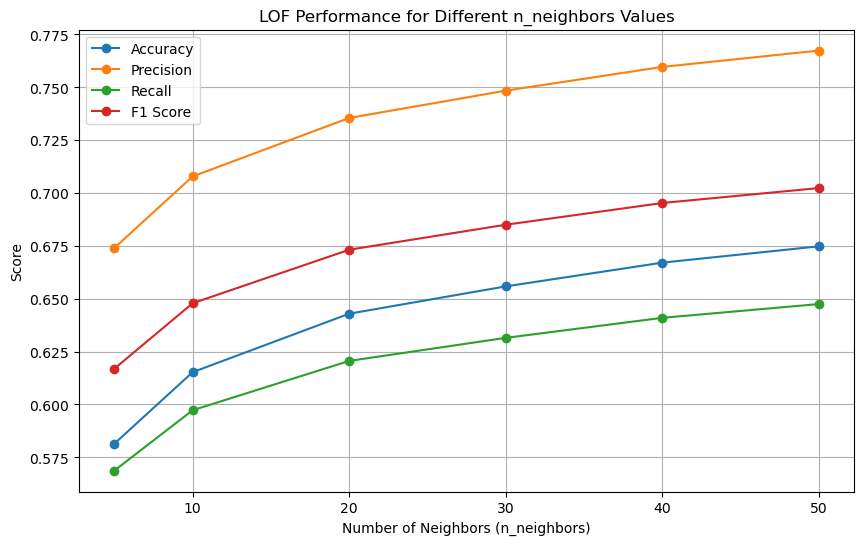

In [19]:
from sklearn.neighbors import LocalOutlierFactor

# Function to evaluate LOF model performance
def evaluate_lof_for_n_neighbors(data, X_scaled, n_neighbors_values):
    results = []
    
    for n_neighbors in n_neighbors_values:
        print(f"\nEvaluating for n_neighbors = {n_neighbors}")
        
        # Create the Local Outlier Factor model
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=0.5)  # Adjust contamination if needed
        
        # Predict anomalies (note: LOF uses -1 for outliers and 1 for inliers)
        data['anomaly'] = lof.fit_predict(X_scaled)
        data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'n_neighbors': n_neighbors,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of n_neighbors values to try (this controls the number of neighbors for LOF)
n_neighbors_values = [5, 10, 20, 30, 40, 50]

# Call the function to evaluate the LOF model for different n_neighbors values
lof_results = evaluate_lof_for_n_neighbors(data, X_scaled, n_neighbors_values)

# Print the best n_neighbors and its corresponding accuracy
best_n_neighbors = max(lof_results, key=lambda x: x['accuracy'])
print(f"\nBest n_neighbors: {best_n_neighbors['n_neighbors']} with Accuracy: {best_n_neighbors['accuracy']:.4f}")
print(f"Precision: {best_n_neighbors['precision']:.4f}, Recall: {best_n_neighbors['recall']:.4f}, F1 Score: {best_n_neighbors['f1_score']:.4f}")

# Visualize the results
n_neighbors_list = [result['n_neighbors'] for result in lof_results]
accuracies = [result['accuracy'] for result in lof_results]
precisions = [result['precision'] for result in lof_results]
recalls = [result['recall'] for result in lof_results]
f1_scores = [result['f1_score'] for result in lof_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score for LOF
plt.plot(n_neighbors_list, accuracies, label='Accuracy', marker='o')
plt.plot(n_neighbors_list, precisions, label='Precision', marker='o')
plt.plot(n_neighbors_list, recalls, label='Recall', marker='o')
plt.plot(n_neighbors_list, f1_scores, label='F1 Score', marker='o')

plt.title('LOF Performance for Different n_neighbors Values')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Accuracy at different value of nu (SVM)


Evaluating for nu = 0.01
Accuracy: 0.4257
Precision: 0.8939
Recall: 0.0349
F1 Score: 0.0673

Evaluating for nu = 0.05
Accuracy: 0.4511
Precision: 0.9332
Recall: 0.0795
F1 Score: 0.1465

Evaluating for nu = 0.1
Accuracy: 0.4928
Precision: 0.9276
Recall: 0.1564
F1 Score: 0.2676

Evaluating for nu = 0.2
Accuracy: 0.5703
Precision: 0.9073
Recall: 0.3062
F1 Score: 0.4579

Evaluating for nu = 0.3
Accuracy: 0.6434
Precision: 0.8933
Recall: 0.4523
F1 Score: 0.6005

Evaluating for nu = 0.4
Accuracy: 0.7124
Precision: 0.8812
Recall: 0.5949
F1 Score: 0.7103

Evaluating for nu = 0.5
Accuracy: 0.7747
Precision: 0.8673
Recall: 0.7318
F1 Score: 0.7938

Best nu: 0.5 with Accuracy: 0.7747
Precision: 0.8673, Recall: 0.7318, F1 Score: 0.7938


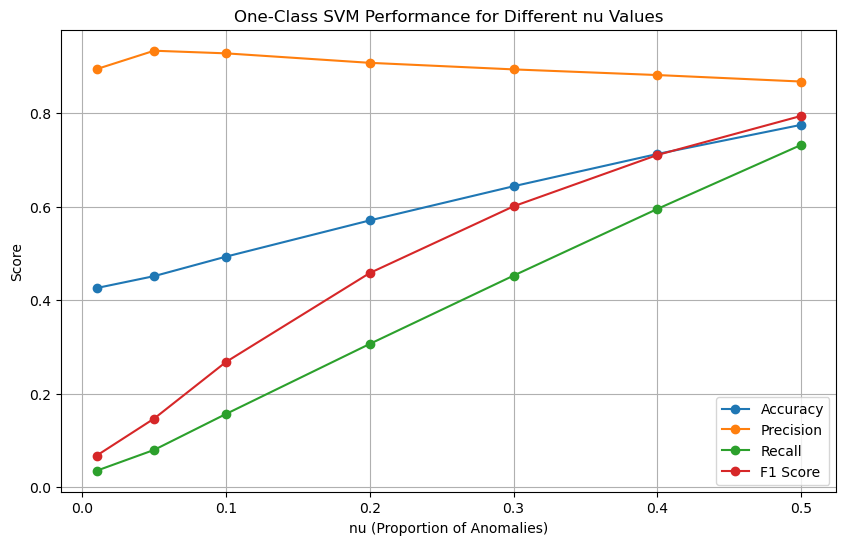

In [20]:
from sklearn.svm import OneClassSVM

# Function to evaluate One-Class SVM model performance for different nu values
def evaluate_svm_for_nu_values(data, X_scaled, nu_values):
    results = []
    
    for nu in nu_values:
        print(f"\nEvaluating for nu = {nu}")
        
        # Create the One-Class SVM model
        oc_svm = OneClassSVM(nu=nu, kernel='rbf', gamma='scale')  # Adjust kernel and gamma if needed
        
        # Fit the model
        oc_svm.fit(X_scaled)
        
        # Predict anomalies (note: One-Class SVM uses -1 for outliers and 1 for inliers)
        data['anomaly'] = oc_svm.predict(X_scaled)
        data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'nu': nu,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of nu values to try (nu controls the proportion of anomalies expected, like contamination)
nu_values = [0.01, 0.05, 0.1, 0.2, 0.3,0.4, 0.5]

# Call the function to evaluate the One-Class SVM for different nu values
svm_results = evaluate_svm_for_nu_values(data, X_scaled, nu_values)

# Print the best nu and its corresponding accuracy
best_nu = max(svm_results, key=lambda x: x['accuracy'])
print(f"\nBest nu: {best_nu['nu']} with Accuracy: {best_nu['accuracy']:.4f}")
print(f"Precision: {best_nu['precision']:.4f}, Recall: {best_nu['recall']:.4f}, F1 Score: {best_nu['f1_score']:.4f}")

# Visualize the results
nu_list = [result['nu'] for result in svm_results]
accuracies = [result['accuracy'] for result in svm_results]
precisions = [result['precision'] for result in svm_results]
recalls = [result['recall'] for result in svm_results]
f1_scores = [result['f1_score'] for result in svm_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score for SVM
plt.plot(nu_list, accuracies, label='Accuracy', marker='o')
plt.plot(nu_list, precisions, label='Precision', marker='o')
plt.plot(nu_list, recalls, label='Recall', marker='o')
plt.plot(nu_list, f1_scores, label='F1 Score', marker='o')

plt.title('One-Class SVM Performance for Different nu Values')
plt.xlabel('nu (Proportion of Anomalies)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Accuracy at different value of K (KNN)


Evaluating for k = 5
Accuracy: 0.7757
Precision: 0.8683
Recall: 0.7326
F1 Score: 0.7947

Evaluating for k = 10
Accuracy: 0.7768
Precision: 0.8694
Recall: 0.7336
F1 Score: 0.7958

Evaluating for k = 15
Accuracy: 0.7771
Precision: 0.8697
Recall: 0.7338
F1 Score: 0.7960

Evaluating for k = 20
Accuracy: 0.7770
Precision: 0.8696
Recall: 0.7337
F1 Score: 0.7959

Evaluating for k = 25
Accuracy: 0.7764
Precision: 0.8690
Recall: 0.7332
F1 Score: 0.7954

Evaluating for k = 30
Accuracy: 0.7760
Precision: 0.8686
Recall: 0.7329
F1 Score: 0.7950

Best k: 15 with Accuracy: 0.7771
Precision: 0.8697, Recall: 0.7338, F1 Score: 0.7960


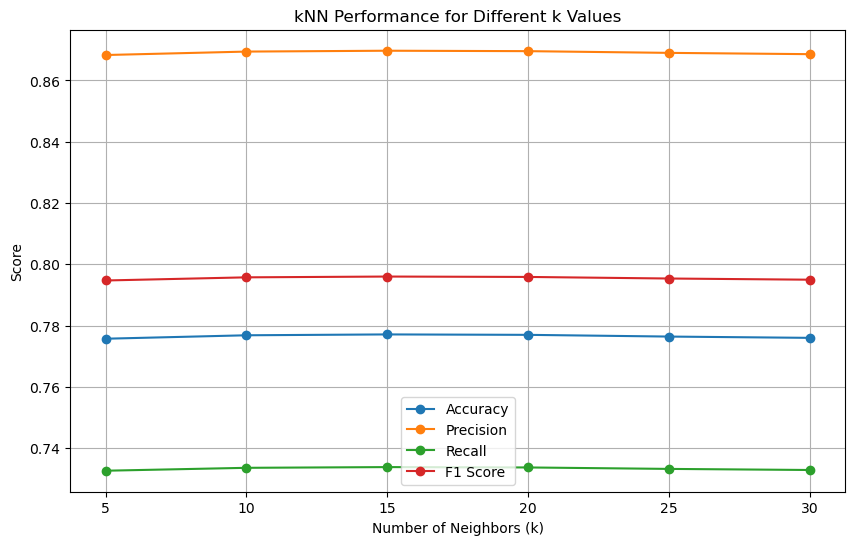

In [21]:
from pyod.models.knn import KNN

# Function to evaluate kNN model performance for different k values
def evaluate_knn_for_k_values(data, X_scaled, k_values):
    results = []
    
    for k in k_values:
        print(f"\nEvaluating for k = {k}")
        
        # Create the kNN model (k=number of neighbors)
        knn = KNN(n_neighbors=k, contamination=0.5)  # Adjust contamination if needed
        
        # Fit the kNN model
        knn.fit(X_scaled)
        
        # Predict anomalies (0 = normal, 1 = anomaly)
        data['anomaly'] = knn.labels_  # Predicted labels
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'k': k,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of k values to try (number of neighbors)
k_values = [5, 10, 15, 20, 25, 30]

# Call the function to evaluate the kNN model for different k values
knn_results = evaluate_knn_for_k_values(data, X_scaled, k_values)

# Print the best k and its corresponding accuracy
best_k = max(knn_results, key=lambda x: x['accuracy'])
print(f"\nBest k: {best_k['k']} with Accuracy: {best_k['accuracy']:.4f}")
print(f"Precision: {best_k['precision']:.4f}, Recall: {best_k['recall']:.4f}, F1 Score: {best_k['f1_score']:.4f}")

# Visualize the results
k_list = [result['k'] for result in knn_results]
accuracies = [result['accuracy'] for result in knn_results]
precisions = [result['precision'] for result in knn_results]
recalls = [result['recall'] for result in knn_results]
f1_scores = [result['f1_score'] for result in knn_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score for kNN
plt.plot(k_list, accuracies, label='Accuracy', marker='o')
plt.plot(k_list, precisions, label='Precision', marker='o')
plt.plot(k_list, recalls, label='Recall', marker='o')
plt.plot(k_list, f1_scores, label='F1 Score', marker='o')

plt.title('kNN Performance for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Accuracy at different value of eps (DBSCAN)


Evaluating for eps = 0.1
Accuracy: 0.6110
Precision: 0.6039
Recall: 0.9987
F1 Score: 0.7526

Evaluating for eps = 0.2
Accuracy: 0.8162
Precision: 0.7753
Recall: 0.9715
F1 Score: 0.8624

Evaluating for eps = 0.3
Accuracy: 0.8387
Precision: 0.8263
Recall: 0.9216
F1 Score: 0.8713

Evaluating for eps = 0.4
Accuracy: 0.8086
Precision: 0.8528
Recall: 0.8183
F1 Score: 0.8352

Evaluating for eps = 0.5
Accuracy: 0.7572
Precision: 0.8740
Recall: 0.6896
F1 Score: 0.7710

Evaluating for eps = 0.6
Accuracy: 0.6997
Precision: 0.8881
Recall: 0.5643
F1 Score: 0.6901

Best eps: 0.3 with Accuracy: 0.8387
Precision: 0.8263, Recall: 0.9216, F1 Score: 0.8713


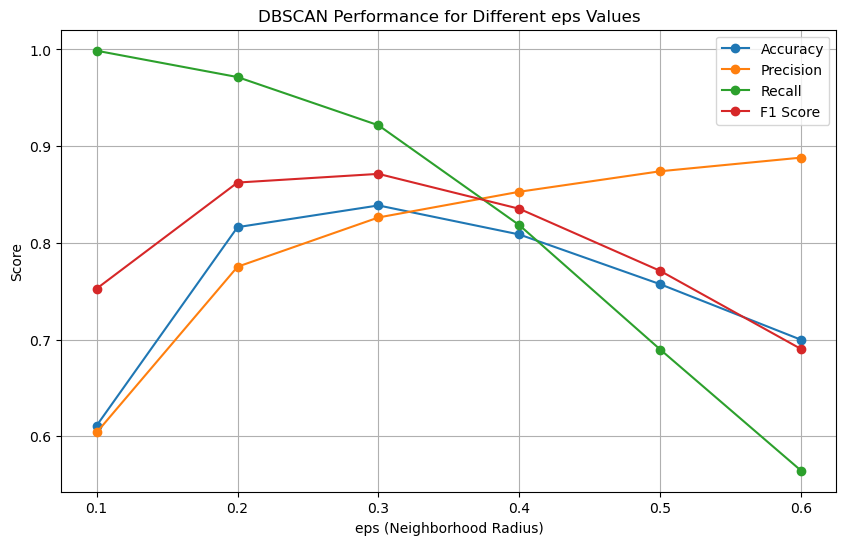

In [22]:
from sklearn.cluster import DBSCAN

# Function to evaluate DBSCAN model performance for different eps values
def evaluate_dbscan_for_eps_values(data, X_scaled, eps_values, min_samples=5):
    results = []
    
    for eps in eps_values:
        print(f"\nEvaluating for eps = {eps}")
        
        # Create the DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # Adjust min_samples as needed
        
        # Fit the DBSCAN model and predict anomalies
        data['anomaly'] = dbscan.fit_predict(X_scaled)
        
        # DBSCAN assigns -1 to noise points (outliers), and other numbers to clustered points.
        # Convert outliers (noise) to 1 (anomaly) and clusters to 0 (normal)
        data['anomaly'] = data['anomaly'].map(lambda x: 1 if x == -1 else 0)
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'eps': eps,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of eps values to try (eps defines the radius for forming clusters)
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Call the function to evaluate DBSCAN for different eps values
dbscan_results = evaluate_dbscan_for_eps_values(data, X_scaled, eps_values)

# Print the best eps and its corresponding accuracy
best_eps = max(dbscan_results, key=lambda x: x['accuracy'])
print(f"\nBest eps: {best_eps['eps']} with Accuracy: {best_eps['accuracy']:.4f}")
print(f"Precision: {best_eps['precision']:.4f}, Recall: {best_eps['recall']:.4f}, F1 Score: {best_eps['f1_score']:.4f}")

# Visualize the results
eps_list = [result['eps'] for result in dbscan_results]
accuracies = [result['accuracy'] for result in dbscan_results]
precisions = [result['precision'] for result in dbscan_results]
recalls = [result['recall'] for result in dbscan_results]
f1_scores = [result['f1_score'] for result in dbscan_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score for DBSCAN
plt.plot(eps_list, accuracies, label='Accuracy', marker='o')
plt.plot(eps_list, precisions, label='Precision', marker='o')
plt.plot(eps_list, recalls, label='Recall', marker='o')
plt.plot(eps_list, f1_scores, label='F1 Score', marker='o')

plt.title('DBSCAN Performance for Different eps Values')
plt.xlabel('eps (Neighborhood Radius)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Using KneighborClassifier


Evaluating for k = 5
Accuracy: 0.9088
Precision: 0.9209
Recall: 0.9246
F1 Score: 0.9228

Evaluating for k = 10
Accuracy: 0.9001
Precision: 0.9294
Recall: 0.8988
F1 Score: 0.9139

Evaluating for k = 15
Accuracy: 0.8975
Precision: 0.9174
Recall: 0.9079
F1 Score: 0.9126

Evaluating for k = 20
Accuracy: 0.8921
Precision: 0.9204
Recall: 0.8944
F1 Score: 0.9072

Evaluating for k = 25
Accuracy: 0.8893
Precision: 0.9129
Recall: 0.8980
F1 Score: 0.9054

Evaluating for k = 30
Accuracy: 0.8849
Precision: 0.9180
Recall: 0.8837
F1 Score: 0.9005

Best k: 5 with Accuracy: 0.9088
Precision: 0.9209, Recall: 0.9246, F1 Score: 0.9228


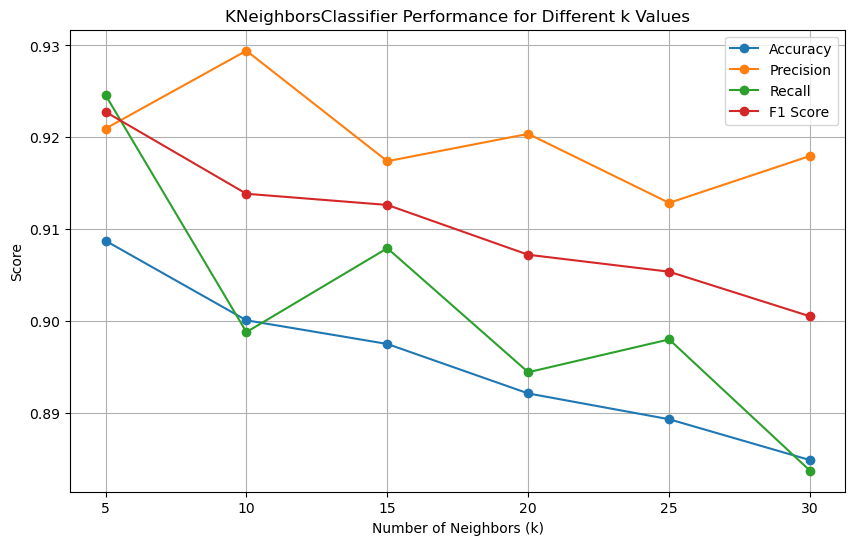

In [23]:
# Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to evaluate KNeighborsClassifier model performance for different k values
def evaluate_knn_classifier_for_k_values(X_train_scaled, X_test_scaled, y_train, y_test, k_values):
    results = []
    
    for k in k_values:
        print(f"\nEvaluating for k = {k}")
        
        # Create the KNeighborsClassifier model (k=number of neighbors)
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        
        # Fit the model
        knn_classifier.fit(X_train_scaled, y_train)
        
        # Predict on the test set
        y_pred = knn_classifier.predict(X_test_scaled)
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'k': k,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of k values to try (number of neighbors)
k_values = [5, 10, 15, 20, 25, 30]

# Call the function to evaluate the KNeighborsClassifier for different k values
knn_classifier_results = evaluate_knn_classifier_for_k_values(X_train_scaled, X_test_scaled, y_train, y_test, k_values)

# Identify the best k based on accuracy
best_k_classifier = max(knn_classifier_results, key=lambda x: x['accuracy'])
print(f"\nBest k: {best_k_classifier['k']} with Accuracy: {best_k_classifier['accuracy']:.4f}")
print(f"Precision: {best_k_classifier['precision']:.4f}, Recall: {best_k_classifier['recall']:.4f}, F1 Score: {best_k_classifier['f1_score']:.4f}")

# Visualize the results
k_list = [result['k'] for result in knn_classifier_results]
accuracies = [result['accuracy'] for result in knn_classifier_results]
precisions = [result['precision'] for result in knn_classifier_results]
recalls = [result['recall'] for result in knn_classifier_results]
f1_scores = [result['f1_score'] for result in knn_classifier_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score for KNeighborsClassifier
plt.plot(k_list, accuracies, label='Accuracy', marker='o')
plt.plot(k_list, precisions, label='Precision', marker='o')
plt.plot(k_list, recalls, label='Recall', marker='o')
plt.plot(k_list, f1_scores, label='F1 Score', marker='o')

plt.title('KNeighborsClassifier Performance for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Applying SVC


Evaluating for C = 0.1
Accuracy: 0.8737
Precision: 0.8957
Recall: 0.8893
F1 Score: 0.8925
ROC-AUC: 0.8702

Evaluating for C = 1
Accuracy: 0.9116
Precision: 0.9247
Recall: 0.9254
F1 Score: 0.9250
ROC-AUC: 0.9085

Evaluating for C = 10
Accuracy: 0.9296
Precision: 0.9366
Recall: 0.9444
F1 Score: 0.9405
ROC-AUC: 0.9263

Evaluating for C = 100
Accuracy: 0.9434
Precision: 0.9513
Recall: 0.9528
F1 Score: 0.9520
ROC-AUC: 0.9413

Best C: 100 with Accuracy: 0.9434
Precision: 0.9513, Recall: 0.9528, F1 Score: 0.9520, ROC-AUC: 0.9413


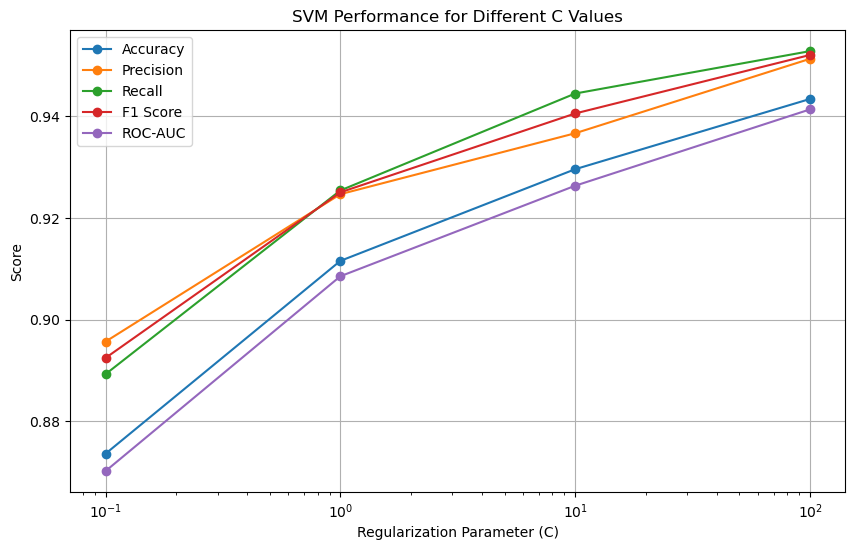

In [24]:
# Imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Function to evaluate SVM model performance for different C values
def evaluate_svm_for_c_values(X_train_scaled, X_test_scaled, y_train, y_test, c_values):
    results = []
    
    for c in c_values:
        print(f"\nEvaluating for C = {c}")
        
        # Create the SVM model with RBF kernel and varying C
        svm_clf = SVC(kernel='rbf', C=c, probability=True, random_state=42)
        
        # Fit the SVM model
        svm_clf.fit(X_train_scaled, y_train)
        
        # Predict on the test set
        y_pred_svm = svm_clf.predict(X_test_scaled)
        
        # Calculate accuracy, precision, recall, F1 score, and ROC-AUC
        accuracy = accuracy_score(y_test, y_pred_svm)
        precision = precision_score(y_test, y_pred_svm)
        recall = recall_score(y_test, y_pred_svm)
        f1 = f1_score(y_test, y_pred_svm)
        roc_auc = roc_auc_score(y_test, y_pred_svm)
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}")
        
        results.append({
            'C': c,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc
        })
    
    return results

# Define a list of C values to try
c_values = [0.1, 1, 10, 100]

# Call the function to evaluate the SVM model for different C values
svm_results = evaluate_svm_for_c_values(X_train_scaled, X_test_scaled, y_train, y_test, c_values)

# Identify the best C value based on accuracy
best_c = max(svm_results, key=lambda x: x['accuracy'])
print(f"\nBest C: {best_c['C']} with Accuracy: {best_c['accuracy']:.4f}")
print(f"Precision: {best_c['precision']:.4f}, Recall: {best_c['recall']:.4f}, F1 Score: {best_c['f1_score']:.4f}, ROC-AUC: {best_c['roc_auc']:.4f}")

# Visualize the results
c_list = [result['C'] for result in svm_results]
accuracies = [result['accuracy'] for result in svm_results]
precisions = [result['precision'] for result in svm_results]
recalls = [result['recall'] for result in svm_results]
f1_scores = [result['f1_score'] for result in svm_results]
roc_aucs = [result['roc_auc'] for result in svm_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, f1 score, and ROC-AUC for SVM
plt.plot(c_list, accuracies, label='Accuracy', marker='o')
plt.plot(c_list, precisions, label='Precision', marker='o')
plt.plot(c_list, recalls, label='Recall', marker='o')
plt.plot(c_list, f1_scores, label='F1 Score', marker='o')
plt.plot(c_list, roc_aucs, label='ROC-AUC', marker='o')

plt.xscale('log')
plt.title('SVM Performance for Different C Values')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Applying on these columns ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features_col = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
X = data[features_col]
Y = data['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize the data for models that require scaled input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store performance results
model_performance = {}

# 1. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
model_performance['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_rf)
}

# 2. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
model_performance['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, y_pred_lr)
}

# 3. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
model_performance['K-Nearest Neighbors'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'F1-Score': f1_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_knn)
}

# 4. Support Vector Machine (SVM)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
model_performance['Support Vector Machine'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'ROC-AUC': roc_auc_score(y_test, y_pred_svm)
}

# 5. Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
model_performance['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'F1-Score': f1_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_gb)
}

# 6. XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
model_performance['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_xgb)
}

# 7. Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_train_scaled)
y_pred_iso = iso_forest.predict(X_test_scaled)
# Convert predictions: IsolationForest outputs -1 for anomalies, convert -1 to 1 and 1 to 0
y_pred_iso = [0 if val == 1 else 1 for val in y_pred_iso]
model_performance['Isolation Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_iso),
    'F1-Score': f1_score(y_test, y_pred_iso),
    'Precision': precision_score(y_test, y_pred_iso),
    'Recall': recall_score(y_test, y_pred_iso),
    'ROC-AUC': roc_auc_score(y_test, y_pred_iso)
}

# 8. Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X_test_scaled)
# Convert predictions: Local Outlier Factor outputs -1 for anomalies, convert -1 to 1 and 1 to 0
y_pred_lof = [0 if val == 1 else 1 for val in y_pred_lof]
model_performance['Local Outlier Factor'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lof),
    'F1-Score': f1_score(y_test, y_pred_lof),
    'Precision': precision_score(y_test, y_pred_lof),
    'Recall': recall_score(y_test, y_pred_lof),
    'ROC-AUC': roc_auc_score(y_test, y_pred_lof)
}

# Print summary of results for each model
print("\nSummary of model performance:")
for model, metrics in model_performance.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


D:\Code\ML\ZM\sample_project_1\env\lib\site-packages\xgboost\core.py:158: UserWarning: [16:18:26] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Summary of model performance:

Model: Random Forest
  Accuracy: 0.8327
  F1-Score: 0.8636
  Precision: 0.8317
  Recall: 0.8980
  ROC-AUC: 0.8184

Model: Logistic Regression
  Accuracy: 0.5880
  F1-Score: 0.7405
  Precision: 0.5889
  Recall: 0.9972
  ROC-AUC: 0.4986

Model: K-Nearest Neighbors
  Accuracy: 0.8147
  F1-Score: 0.8421
  Precision: 0.8462
  Recall: 0.8381
  ROC-AUC: 0.8096

Model: Support Vector Machine
  Accuracy: 0.8212
  F1-Score: 0.8473
  Precision: 0.8535
  Recall: 0.8413
  ROC-AUC: 0.8169

Model: Gradient Boosting
  Accuracy: 0.8292
  F1-Score: 0.8573
  Precision: 0.8450
  Recall: 0.8698
  ROC-AUC: 0.8203

Model: XGBoost
  Accuracy: 0.8250
  F1-Score: 0.8550
  Precision: 0.8356
  Recall: 0.8754
  ROC-AUC: 0.8140

Model: Isolation Forest
  Accuracy: 0.4925
  F1-Score: 0.2595
  Precision: 0.9291
  Recall: 0.1508
  ROC-AUC: 0.5671

Model: Local Outlier Factor
  Accuracy: 0.4862
  F1-Score: 0.2551
  Precision: 0.8785
  Recall: 0.1492
  ROC-AUC: 0.5598



Performance Summary Table:
                        Accuracy  F1-Score  Precision    Recall   ROC-AUC
Random Forest           0.832709  0.863576   0.831680  0.898016  0.818449
Logistic Regression     0.587974  0.740533   0.588938  0.997222  0.498611
K-Nearest Neighbors     0.814693  0.842105   0.846154  0.838095  0.809584
Support Vector Machine  0.821245  0.847322   0.853462  0.841270  0.816872
Gradient Boosting       0.829200  0.857255   0.845027  0.869841  0.820325
XGBoost                 0.824988  0.855039   0.835606  0.875397  0.813981
Isolation Forest        0.492513  0.259474   0.929095  0.150794  0.567130
Local Outlier Factor    0.486196  0.255088   0.878505  0.149206  0.559780


<Figure size 1000x600 with 0 Axes>

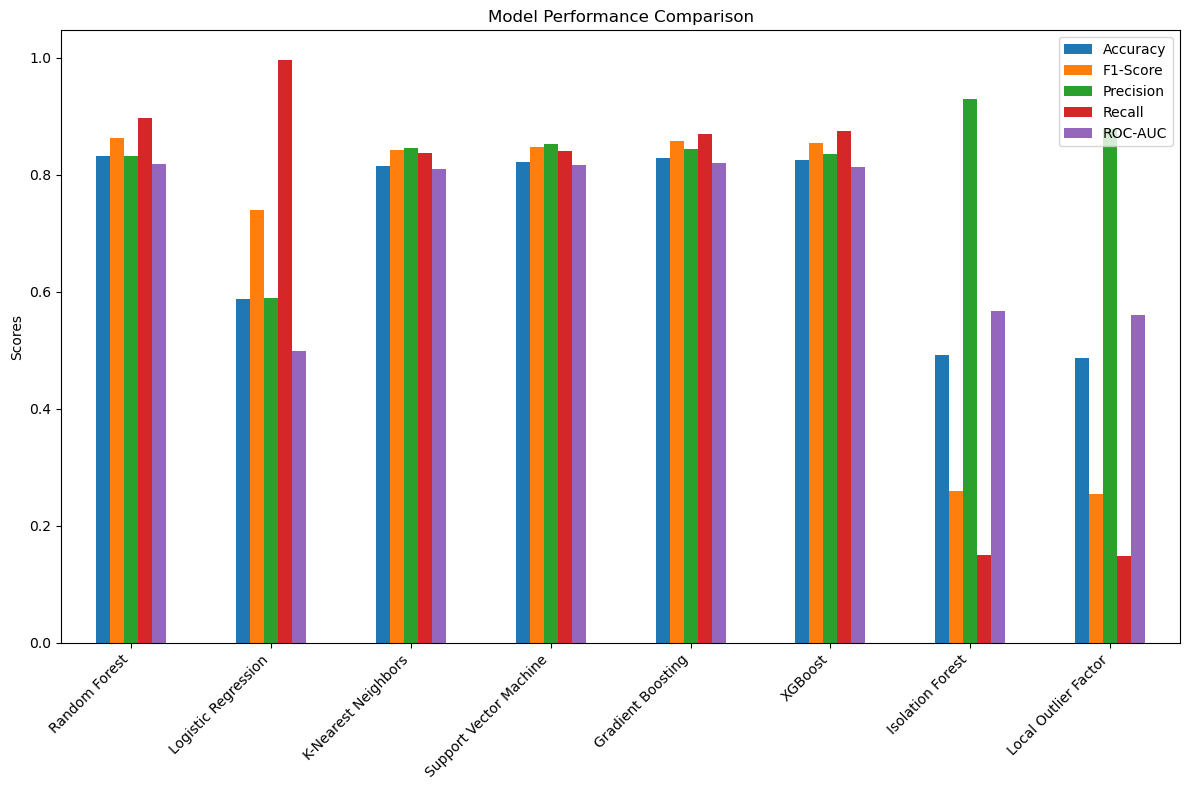

In [38]:
performance_df = pd.DataFrame(model_performance).T  # Transpose for better readability

# Display the performance metrics in a table format
print("\nPerformance Summary Table:")
print(performance_df)

# Plot the performance metrics for each model
plt.figure(figsize=(10, 6))
performance_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

## with all column

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns = ["label","Time"])
Y = data['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize the data for models that require scaled input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store performance results
model_performance = {}

# 1. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
model_performance['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_rf)
}

# 2. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
model_performance['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, y_pred_lr)
}

# 3. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
model_performance['K-Nearest Neighbors'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'F1-Score': f1_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_knn)
}

# 4. Support Vector Machine (SVM)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
model_performance['Support Vector Machine'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'ROC-AUC': roc_auc_score(y_test, y_pred_svm)
}

# 5. Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
model_performance['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'F1-Score': f1_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_gb)
}

# 6. XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
model_performance['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_xgb)
}

# 7. Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_train_scaled)
y_pred_iso = iso_forest.predict(X_test_scaled)
# Convert predictions: IsolationForest outputs -1 for anomalies, convert -1 to 1 and 1 to 0
y_pred_iso = [0 if val == 1 else 1 for val in y_pred_iso]
model_performance['Isolation Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_iso),
    'F1-Score': f1_score(y_test, y_pred_iso),
    'Precision': precision_score(y_test, y_pred_iso),
    'Recall': recall_score(y_test, y_pred_iso),
    'ROC-AUC': roc_auc_score(y_test, y_pred_iso)
}

# 8. Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X_test_scaled)
# Convert predictions: Local Outlier Factor outputs -1 for anomalies, convert -1 to 1 and 1 to 0
y_pred_lof = [0 if val == 1 else 1 for val in y_pred_lof]
model_performance['Local Outlier Factor'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lof),
    'F1-Score': f1_score(y_test, y_pred_lof),
    'Precision': precision_score(y_test, y_pred_lof),
    'Recall': recall_score(y_test, y_pred_lof),
    'ROC-AUC': roc_auc_score(y_test, y_pred_lof)
}

# Print summary of results for each model
print("\nSummary of model performance:")
for model, metrics in model_performance.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


D:\Code\ML\ZM\sample_project_1\env\lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:24] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Summary of model performance:

Model: Random Forest
  Accuracy: 0.9630
  F1-Score: 0.9690
  Precision: 0.9578
  Recall: 0.9806
  ROC-AUC: 0.9592

Model: Logistic Regression
  Accuracy: 0.8524
  F1-Score: 0.8723
  Precision: 0.8898
  Recall: 0.8556
  ROC-AUC: 0.8517

Model: K-Nearest Neighbors
  Accuracy: 0.9113
  F1-Score: 0.9243
  Precision: 0.9301
  Recall: 0.9187
  ROC-AUC: 0.9097

Model: Support Vector Machine
  Accuracy: 0.9118
  F1-Score: 0.9251
  Precision: 0.9260
  Recall: 0.9242
  ROC-AUC: 0.9091

Model: Gradient Boosting
  Accuracy: 0.9832
  F1-Score: 0.9858
  Precision: 0.9819
  Recall: 0.9897
  ROC-AUC: 0.9817

Model: XGBoost
  Accuracy: 0.9815
  F1-Score: 0.9844
  Precision: 0.9811
  Recall: 0.9877
  ROC-AUC: 0.9802

Model: Isolation Forest
  Accuracy: 0.4925
  F1-Score: 0.2610
  Precision: 0.9229
  Recall: 0.1520
  ROC-AUC: 0.5669

Model: Local Outlier Factor
  Accuracy: 0.4698
  F1-Score: 0.2313
  Precision: 0.7967
  Recall: 0.1353
  ROC-AUC: 0.5429



Performance Summary Table:
                        Accuracy  F1-Score  Precision    Recall   ROC-AUC
Random Forest           0.963032  0.969020   0.957752  0.980556  0.959206
Logistic Regression     0.852363  0.872345   0.889806  0.855556  0.851666
K-Nearest Neighbors     0.911324  0.924336   0.930092  0.918651  0.909724
Support Vector Machine  0.911792  0.925124   0.926044  0.924206  0.909082
Gradient Boosting       0.983154  0.985771   0.981890  0.989683  0.981728
XGBoost                 0.981516  0.984378   0.981080  0.987698  0.980166
Isolation Forest        0.492513  0.260988   0.922892  0.151984  0.566870
Local Outlier Factor    0.469818  0.231343   0.796729  0.135317  0.542858


<Figure size 1000x600 with 0 Axes>

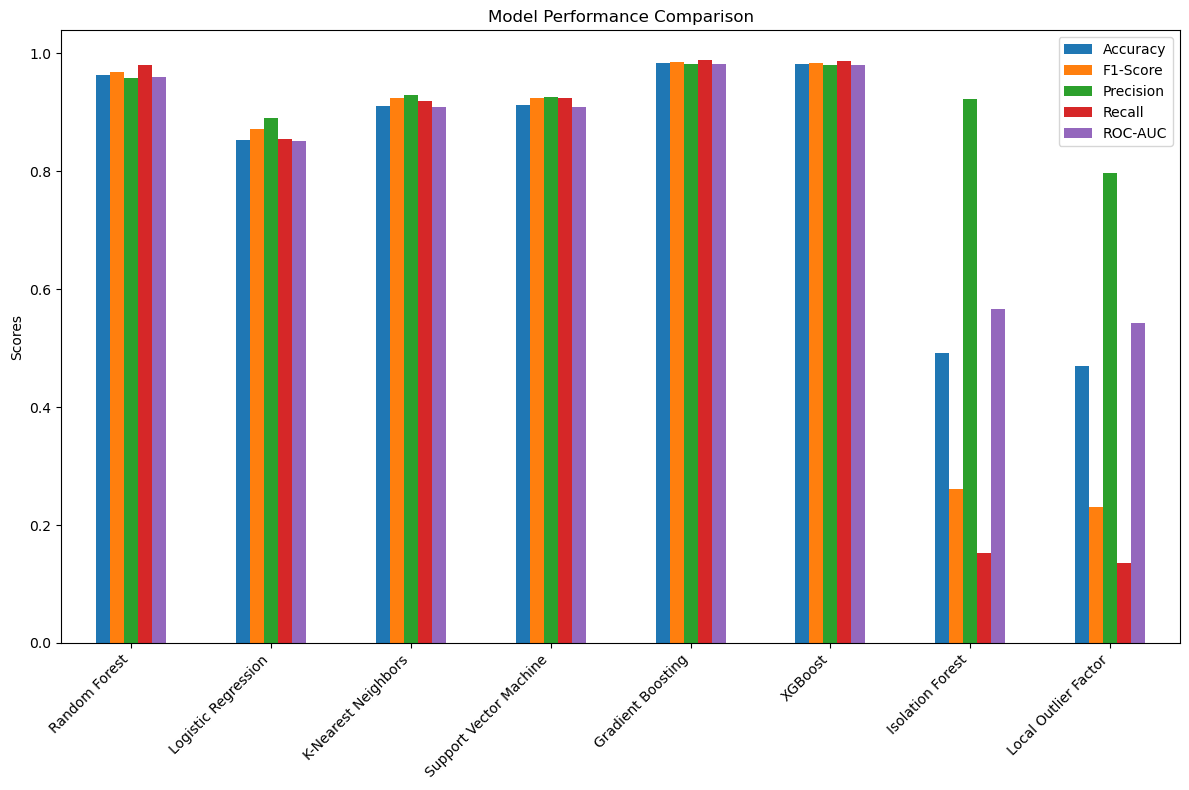

In [36]:
performance_df = pd.DataFrame(model_performance).T  # Transpose for better readability

# Display the performance metrics in a table format
print("\nPerformance Summary Table:")
print(performance_df)

# Plot the performance metrics for each model
plt.figure(figsize=(10, 6))
performance_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,14236,14237,14238,14239,14240,14241,14242,14243,14244,14245
Longitude,73.822661,73.822661,73.822661,73.822661,73.822661,73.822661,73.822661,73.822661,73.822661,73.822661,...,73.822813,73.822813,73.822813,73.822813,73.822813,73.822813,73.822813,73.822813,73.822813,73.822813
Latitude,18.501627,18.501627,18.501627,18.501627,18.501627,18.501627,18.501627,18.501627,18.501627,18.501627,...,18.501587,18.501587,18.501587,18.501587,18.501587,18.501587,18.501587,18.501587,18.501587,18.501587
Speed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Distance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2096.5732,2096.5732,2096.5732,2096.5732,2096.5732,2096.5732,2096.5732,2096.5732,2096.5732,2096.5732
Time,1900-01-01 18:45:12,1900-01-01 18:45:12,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,...,1900-01-01 17:27:33,1900-01-01 17:27:34,1900-01-01 17:27:34,1900-01-01 17:27:34,1900-01-01 17:27:34,1900-01-01 17:27:34,1900-01-01 17:27:34,1900-01-01 17:27:34,1900-01-01 17:27:34,1900-01-01 17:27:35
Acc X,0.046402,-0.136978,-0.045355,0.242089,-0.230234,0.082438,-0.056367,0.188808,-0.251556,0.079666,...,-0.182038,0.012605,-0.021724,0.334543,0.551813,-0.255498,-1.276934,-0.436406,-0.436406,-0.436406
Acc Y,-0.137178,0.365242,-0.10334,0.072761,0.011765,0.000148,0.109046,-0.05486,0.383986,0.366187,...,0.19447,0.670329,0.494088,0.51944,0.443052,-0.540867,0.548246,-0.219264,-0.219264,-0.219264
Acc Z,-0.282934,0.108889,-0.534985,-0.350396,-0.494085,-0.028263,-0.491904,-0.53694,0.500458,-0.263,...,0.234649,-0.379815,-0.914526,-0.434923,-0.714437,1.586697,-0.201897,0.397958,0.397958,0.397958
Heading,352,352,352,352,352,352,352,352,352,352,...,11,11,11,11,11,11,11,11,11,11
gyro_x,-0.036306,0.035776,-0.011871,-0.01798,0.011342,-0.028365,0.042496,0.000346,-0.002708,-0.024699,...,-0.00283,0.013052,-0.098125,-0.032763,-0.114008,0.238461,0.102849,-0.051089,-0.001609,-0.001609


## Data Augmentation

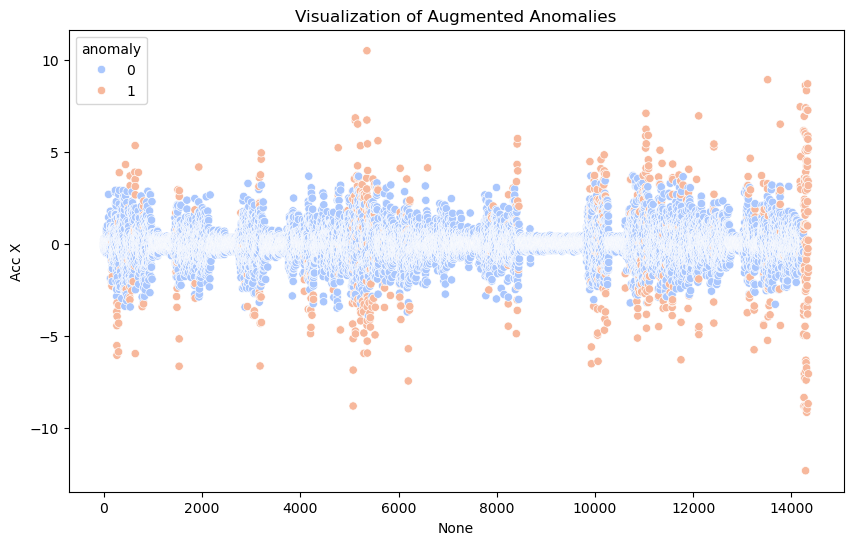

------------------------------------------------------------------
Accuracy: 0.9569217900460059

Performance on Augmented Data:
Precision: 0.14, Recall: 1.00, F1 Score: 0.24

Comparison with Original Performance:
Precision: 0.87 vs 0.14
Recall: 0.73 vs 1.00
F1 Score: 0.79 vs 0.24


In [6]:
df_final=data
# Function to generate synthetic anomalies
def generate_synthetic_anomalies(data, num_anomalies=50):
    synthetic_data = data.copy()
    anomalies = []

    for _ in range(num_anomalies):
        random_row = data.sample(1).copy()
        random_row[['Acc X', 'Acc Y', 'Acc Z']] += np.random.normal(0, 5, 3)
        random_row[['gyro_x', 'gyro_y', 'gyro_z']] += np.random.normal(0, 3, 3)
        anomalies.append(random_row)

    synthetic_anomalies = pd.concat(anomalies, ignore_index=True)
    augmented_data = pd.concat([synthetic_data, synthetic_anomalies], ignore_index=True)
    
    # Label synthetic anomalies as 1 and real data as 0
    augmented_data['label'] = [0] * len(data) + [1] * num_anomalies
    return augmented_data

# Generate and integrate synthetic anomalies
augmented_data = generate_synthetic_anomalies(df_final, num_anomalies=100)

# Rerun Isolation Forest with augmented data
iso_forest_augmented = IsolationForest(contamination=0.05, n_estimators=100, max_samples=0.75, random_state=42)
iso_forest_augmented.fit(augmented_data[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']])

# Predictions on augmented data
predictions_augmented = iso_forest_augmented.predict(augmented_data[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']])
augmented_data['anomaly'] = (predictions_augmented == -1).astype(int)

# Visualization: Scatter plot for synthetic anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=augmented_data.index, y=augmented_data['Acc X'], hue=augmented_data['anomaly'], palette="coolwarm")
plt.title("Visualization of Augmented Anomalies")
plt.show()

# Recalculate precision, recall, and F1-score with augmented data
accuracy_aug = accuracy_score(augmented_data['label'], augmented_data['anomaly'])
precision_aug = precision_score(augmented_data['label'], augmented_data['anomaly'])
recall_aug = recall_score(augmented_data['label'], augmented_data['anomaly'])
f1_aug = f1_score(augmented_data['label'], augmented_data['anomaly'])
print('------------------------------------------------------------------')
print(f'Accuracy: {accuracy_aug}')

print("\nPerformance on Augmented Data:")
print(f"Precision: {precision_aug:.2f}, Recall: {recall_aug:.2f}, F1 Score: {f1_aug:.2f}")

# Compare performance
print(f"\nComparison with Original Performance:\nPrecision: {precision:.2f} vs {precision_aug:.2f}")
print(f"Recall: {recall:.2f} vs {recall_aug:.2f}")
print(f"F1 Score: {f1:.2f} vs {f1_aug:.2f}")


In [39]:
augmented_data.T

,0,1,2,3,4,5,6,7,8,9,...,14336,14337,14338,14339,14340,14341,14342,14343,14344,14345
Longitude,73.822661,73.822661,73.822661,73.822661,73.822661,73.822661,73.822661,73.822661,73.822661,73.822661,...,73.823028,73.82912,73.830765,73.821206,73.8286,73.828965,73.821843,73.830587,73.828572,73.828962
Latitude,18.501627,18.501627,18.501627,18.501627,18.501627,18.501627,18.501627,18.501627,18.501627,18.501627,...,18.501613,18.511866,18.516006,18.504076,18.509841,18.515265,18.502068,18.508909,18.507213,18.515267
Speed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.568,0.58,0.0,1.252,0.0,1.226,0.0,1.432,0.218
Distance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2084.3687,791.4674,1807.0334,311.619,1104.5157,454.5639,2095.6057,1086.5707,1304.223,454.57956
Time,1900-01-01 18:45:12,1900-01-01 18:45:12,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,1900-01-01 18:45:13,...,1900-01-01 17:25:44,1900-01-01 17:18:20,1900-01-01 18:55:21,1900-01-01 18:48:37,1900-01-01 18:52:07,1900-01-01 17:16:56,1900-01-01 17:25:05,1900-01-01 17:21:06,1900-01-01 17:22:38,1900-01-01 17:17:19
Acc X,0.046402,-0.136978,-0.045355,0.242089,-0.230234,0.082438,-0.056367,0.188808,-0.251556,0.079666,...,-0.259161,3.403446,-1.555134,-8.679615,5.187347,0.191567,3.166274,-3.047813,-7.056131,-1.318765
Acc Y,-0.137178,0.365242,-0.10334,0.072761,0.011765,0.000148,0.109046,-0.05486,0.383986,0.366187,...,3.354195,-1.460068,5.665447,-8.431138,-1.233731,0.83681,4.517025,10.214509,-4.537805,2.836333
Acc Z,-0.282934,0.108889,-0.534985,-0.350396,-0.494085,-0.028263,-0.491904,-0.53694,0.500458,-0.263,...,-3.888391,-7.11712,1.02277,-8.692308,0.51396,0.813754,-0.380514,-0.089503,-9.101158,-9.587069
Heading,352,352,352,352,352,352,352,352,352,352,...,162,243,161,72,107,10,245,246,345,15
gyro_x,-0.036306,0.035776,-0.011871,-0.01798,0.011342,-0.028365,0.042496,0.000346,-0.002708,-0.024699,...,-0.473016,-2.464551,-0.094892,4.012476,-1.752217,1.568597,5.722527,2.965352,5.102853,-2.77598


## Applying Isolation-Forest and Local Outlier Factor on Augmented data

In [17]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Isolation Forest setup and evaluation
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, max_samples=0.75, random_state=42)
iso_forest.fit(augmented_data[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']])

# Predictions with Isolation Forest
predictions_iso = iso_forest.predict(augmented_data[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']])
predictions_iso = (predictions_iso == -1).astype(int)  # Convert to 1 for anomaly, 0 for normal

# Calculate Isolation Forest performance metrics
accuracy_iso = accuracy_score(augmented_data['label'], predictions_iso)
precision_iso = precision_score(augmented_data['label'], predictions_iso)
recall_iso = recall_score(augmented_data['label'], predictions_iso)
f1_iso = f1_score(augmented_data['label'], predictions_iso)

# LOF setup and evaluation
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
predictions_lof = lof.fit_predict(augmented_data[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']])
predictions_lof = (predictions_lof == -1).astype(int)  # Convert to 1 for anomaly, 0 for normal

# Calculate LOF performance metrics
accuracy_lof = accuracy_score(augmented_data['label'], predictions_lof)
precision_lof = precision_score(augmented_data['label'], predictions_lof)
recall_lof = recall_score(augmented_data['label'], predictions_lof)
f1_lof = f1_score(augmented_data['label'], predictions_lof)

# Print final performance comparison
print("Performance Comparison on Augmented Dataset:")
print("\nIsolation Forest:")
print(f"Accuracy: {accuracy_iso:.2f}")
print(f"Precision: {precision_iso:.2f}")
print(f"Recall: {recall_iso:.2f}")
print(f"F1 Score: {f1_iso:.2f}")

print("\nLocal Outlier Factor (LOF):")
print(f"Accuracy: {accuracy_lof:.2f}")
print(f"Precision: {precision_lof:.2f}")
print(f"Recall: {recall_lof:.2f}")
print(f"F1 Score: {f1_lof:.2f}")


Performance Comparison on Augmented Dataset:

Isolation Forest:
Accuracy: 0.96
Precision: 0.14
Recall: 1.00
F1 Score: 0.24

Local Outlier Factor (LOF):
Accuracy: 0.96
Precision: 0.14
Recall: 1.00
F1 Score: 0.24
